# Random Survival Forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest
from sksurv.tree import SurvivalTree

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
#read pickle files
X_train = pd.read_pickle(r'X_short_A.pkl')
X_test = pd.read_pickle(r'X_short_B.pkl')
y_train = pd.read_pickle(r'y_short_A.pkl')
y_test = pd.read_pickle(r'y_short_B.pkl')

In [4]:
X_train.head()

,ALPmedian,ALTmedian,ASTmedian,Agemean,Albuminmedian,BMI_Cat,BUNmedian,Bilirubinmedian,Cholesterolmedian,Creatininemedian,Diabetes,FiO2median,GCSComa,GCSmin,Genderfirst,Glucosemedian,HCO3median,HCTmedian,HRmedian,Hyperglycemia,Hypertension,Hypoglycemia,ICUTypemax,Kmedian,Lactatemedian,Length_of_staymean,MeanDiasABPfirst,MeanMAPfirst,MeanSysABPfirst,MechVentmax,Mgmedian,Namedian,PaCO2median,PaO2FiO2median,PaO2median,Plateletsmedian,Renal Injury,RespRatemedian,SaO2median,Tachycardia,Tachypnea,TroponinImedian,TroponinTmedian,Urinemean48h,WBCmedian,new_Heightfirst,new_Tempmedian,new_Weightfirst,pHmedian
0,0.044325,0.002832,0.002552,0.520000,0.452381,0,0.048711,0.013100,0.413907,0.034591,2,0.305556,0,14.0,0.0,0.252273,0.487179,0.404324,0.323529,0,1,0,4.0,0.333333,0.057732,5,0.385714,0.269312,0.539906,0.0,0.111111,0.450450,0.294118,0.242489,0.200422,0.211019,0,0.388889,0.958333,0,1,0.03681,0.00541,0.013210,0.072495,0.500894,0.696970,0.431500,0.542857
1,0.044325,0.002832,0.002552,0.813333,0.452381,0,0.091691,0.013100,0.413907,0.062893,0,0.305556,0,3.0,1.0,0.173864,0.358974,0.302703,0.392157,0,0,0,2.0,0.274510,0.057732,8,0.296429,0.167264,0.265258,1.0,0.185185,0.459459,0.305882,0.242489,0.267932,0.186777,0,0.416667,0.950000,0,0,0.03681,0.00541,0.013030,0.092395,0.592129,0.606061,0.412861,0.561905
2,0.069846,0.008091,0.012345,0.386667,0.333333,0,0.005731,0.061135,0.413907,0.006289,0,0.305556,1,5.0,0.0,0.209091,0.435897,0.300541,0.446078,0,1,0,3.0,0.176471,0.037113,19,0.510714,0.310326,0.509390,1.0,0.129630,0.477477,0.258824,0.242489,0.199367,0.079890,0,0.416667,0.916667,1,0,0.03681,0.00541,0.010742,0.029140,0.500894,0.742424,0.232992,0.752381
3,0.062458,0.000910,0.000574,0.706667,0.785714,1,0.103152,0.002183,0.413907,0.031447,0,0.305556,0,14.0,1.0,0.154545,0.512821,0.475676,0.333333,0,0,0,3.0,0.294118,0.057732,9,0.371429,0.248804,0.478873,0.0,0.185185,0.513514,0.294118,0.242489,0.200422,0.334435,0,0.333333,0.958333,0,1,0.03681,0.00541,0.006867,0.061834,0.681574,0.303030,0.493010,0.542857
4,0.044325,0.002832,0.002552,0.973333,0.523810,0,0.189112,0.013100,0.413907,0.050314,0,0.305556,0,15.0,0.0,0.121591,0.282051,0.341622,0.323529,0,1,0,3.0,0.274510,0.057732,4,0.214286,0.207717,0.525822,0.0,0.083333,0.504505,0.294118,0.242489,0.200422,0.100826,0,0.416667,0.958333,0,1,0.03681,0.00541,0.004951,0.029851,0.500894,0.484848,0.431500,0.542857


In [5]:
X_test.head()

,ALPmedian,ALTmedian,ASTmedian,Agemean,Albuminmedian,BMI_Cat,BUNmedian,Bilirubinmedian,Cholesterolmedian,Creatininemedian,Diabetes,FiO2median,GCSComa,GCSmin,Genderfirst,Glucosemedian,HCO3median,HCTmedian,HRmedian,Hyperglycemia,Hypertension,Hypoglycemia,ICUTypemax,Kmedian,Lactatemedian,Length_of_staymean,MeanDiasABPfirst,MeanMAPfirst,MeanSysABPfirst,MechVentmax,Mgmedian,Namedian,PaCO2median,PaO2FiO2median,PaO2median,Plateletsmedian,Renal Injury,RespRatemedian,SaO2median,Tachycardia,Tachypnea,TroponinImedian,TroponinTmedian,Urinemean48h,WBCmedian,new_Heightfirst,new_Tempmedian,new_Weightfirst,pHmedian
0,0.007564,0.009015,0.076039,0.729730,0.210526,1,0.071429,0.041441,0.36,0.063291,1,1.000000,1,3.0,1.0,0.248018,0.302326,0.520581,0.232653,0,0,0,2.0,0.414286,0.190981,9,0.376147,0.310663,0.334862,1.0,0.200000,0.586957,0.341772,0.167470,0.444712,0.058562,0,0.307692,0.967213,0,0,0.048283,0.004795,0.021675,0.019583,0.592129,0.371429,0.521822,0.560748
1,0.048979,0.002404,0.003501,0.554054,0.447368,0,0.148352,0.012613,0.36,0.018987,2,0.367089,0,14.0,0.0,0.322763,0.151163,0.552058,0.453061,1,0,0,3.0,0.214286,0.074271,31,0.293578,0.318765,0.454128,0.0,0.161538,0.663043,0.341772,0.213253,0.230769,0.449919,0,0.230769,0.959016,1,1,0.048283,0.004795,0.006186,0.058436,0.500894,0.400000,0.453510,0.579439
2,0.048411,0.003907,0.001845,0.594595,0.447368,0,0.120879,0.012613,0.36,0.037975,0,0.367089,0,7.0,1.0,0.192525,0.511628,0.670702,0.436735,0,0,0,3.0,0.400000,0.074271,17,0.389908,0.305577,0.341743,1.0,0.161538,0.500000,0.569620,0.213253,0.103365,0.172456,0,0.307692,0.885246,1,0,0.048283,0.004795,0.007665,0.045120,0.728086,0.771429,0.462998,0.691589
3,0.023449,0.074998,0.099508,0.648649,0.289474,1,0.071429,0.022523,0.36,0.082278,1,0.620253,1,3.0,1.0,0.291053,0.255814,0.443099,0.330612,0,0,0,2.0,0.585714,0.169761,17,0.522936,0.347212,0.486239,1.0,0.138462,0.532609,0.379747,0.213253,0.237981,0.060985,0,0.307692,0.877049,0,0,0.048283,0.004795,0.007952,0.063763,0.681574,0.542857,0.561055,0.429907
4,0.048979,0.002404,0.003501,0.472973,0.447368,2,0.098901,0.012613,0.36,0.044304,0,0.620253,0,14.0,1.0,0.220838,0.453488,0.598063,0.546939,0,0,0,4.0,0.371429,0.074271,9,0.366972,0.305577,0.383028,0.0,0.153846,0.608696,0.481013,0.213253,0.103365,0.145396,0,0.346154,0.959016,1,1,0.048283,0.004795,0.004304,0.044337,0.545617,0.700000,0.569260,0.542056


In [6]:
y_test

0       1
1       0
2       1
3       0
4       0
       ..
3990    0
3991    0
3992    0
3993    0
3994    0
Name: In-hospital_deathmax, Length: 3995, dtype: category
Categories (2, int64): [0, 1]

In [7]:
#create y_train 
frames = [y_train, X_train['Length_of_staymean']]
y_train1 = pd.concat(frames, axis = 1)
y_train1

,In-hospital_deathmax,Length_of_staymean
0,0,5
1,0,8
2,0,19
3,0,9
4,0,4
...,...,...
3992,0,10
3993,0,3
3994,0,11
3995,1,8


In [8]:
#remove entries with length_of_stay = -1 for x trainset
X_train = X_train[X_train.Length_of_staymean != -1]
X_train['Length_of_staymean'] = X_train['Length_of_staymean'].astype("int")
X_train.describe()

,ALPmedian,ALTmedian,ASTmedian,Agemean,Albuminmedian,BUNmedian,Bilirubinmedian,Cholesterolmedian,Creatininemedian,FiO2median,Glucosemedian,HCO3median,HCTmedian,HRmedian,Kmedian,Lactatemedian,Length_of_staymean,MeanDiasABPfirst,MeanMAPfirst,MeanSysABPfirst,Mgmedian,Namedian,PaCO2median,PaO2FiO2median,PaO2median,Plateletsmedian,RespRatemedian,SaO2median,TroponinImedian,TroponinTmedian,Urinemean48h,WBCmedian,new_Heightfirst,new_Tempmedian,new_Weightfirst,pHmedian
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.051892,0.009094,0.007870,0.657871,0.449611,0.134505,0.024417,0.414824,0.073361,0.313772,0.191987,0.401702,0.359972,0.454543,0.316333,0.068257,13.667259,0.360791,0.231471,0.426769,0.169591,0.493610,0.303795,0.243974,0.221380,0.212020,0.420233,0.952813,0.041923,0.013738,0.014646,0.087575,0.496690,0.499057,0.445052,0.535779
std,0.047233,0.045120,0.039011,0.233088,0.096930,0.119631,0.064809,0.042755,0.089208,0.161098,0.086803,0.105554,0.098647,0.146266,0.094342,0.050812,12.210448,0.103030,0.066008,0.111136,0.057220,0.074513,0.080601,0.039070,0.102325,0.113956,0.059225,0.038133,0.049930,0.052667,0.056416,0.046914,0.135729,0.160911,0.172066,0.095406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044325,0.002832,0.002552,0.506667,0.452381,0.063037,0.013100,0.413907,0.031447,0.236111,0.137500,0.333333,0.291892,0.352941,0.254902,0.053608,6.000000,0.292857,0.188406,0.349765,0.129630,0.450450,0.270588,0.242489,0.164557,0.135537,0.416667,0.958333,0.036810,0.005410,0.005044,0.061123,0.500894,0.393939,0.329916,0.495238
50%,0.044325,0.002832,0.002552,0.693333,0.452381,0.094556,0.013100,0.413907,0.044025,0.305556,0.177273,0.410256,0.344865,0.450980,0.313725,0.057732,10.000000,0.350000,0.224638,0.415493,0.166667,0.495495,0.294118,0.242489,0.200422,0.192287,0.416667,0.958333,0.036810,0.005410,0.007964,0.080313,0.500894,0.484848,0.431500,0.542857
75%,0.044325,0.002832,0.002552,0.840000,0.452381,0.160458,0.013100,0.413907,0.075472,0.305556,0.226136,0.461538,0.417297,0.549020,0.372549,0.061856,17.000000,0.421429,0.263297,0.492958,0.203704,0.531532,0.329412,0.242489,0.248945,0.261157,0.416667,0.958333,0.036810,0.005410,0.011405,0.105188,0.500894,0.606061,0.543336,0.580952
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.823529,1.000000,154.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#remove Survival and length of stay from trainset
X_train = X_train.drop(['Length_of_staymean'], axis=1)
X_train.head()

,ALPmedian,ALTmedian,ASTmedian,Agemean,Albuminmedian,BMI_Cat,BUNmedian,Bilirubinmedian,Cholesterolmedian,Creatininemedian,Diabetes,FiO2median,GCSComa,GCSmin,Genderfirst,Glucosemedian,HCO3median,HCTmedian,HRmedian,Hyperglycemia,Hypertension,Hypoglycemia,ICUTypemax,Kmedian,Lactatemedian,MeanDiasABPfirst,MeanMAPfirst,MeanSysABPfirst,MechVentmax,Mgmedian,Namedian,PaCO2median,PaO2FiO2median,PaO2median,Plateletsmedian,Renal Injury,RespRatemedian,SaO2median,Tachycardia,Tachypnea,TroponinImedian,TroponinTmedian,Urinemean48h,WBCmedian,new_Heightfirst,new_Tempmedian,new_Weightfirst,pHmedian
0,0.044325,0.002832,0.002552,0.520000,0.452381,0,0.048711,0.013100,0.413907,0.034591,2,0.305556,0,14.0,0.0,0.252273,0.487179,0.404324,0.323529,0,1,0,4.0,0.333333,0.057732,0.385714,0.269312,0.539906,0.0,0.111111,0.450450,0.294118,0.242489,0.200422,0.211019,0,0.388889,0.958333,0,1,0.03681,0.00541,0.013210,0.072495,0.500894,0.696970,0.431500,0.542857
1,0.044325,0.002832,0.002552,0.813333,0.452381,0,0.091691,0.013100,0.413907,0.062893,0,0.305556,0,3.0,1.0,0.173864,0.358974,0.302703,0.392157,0,0,0,2.0,0.274510,0.057732,0.296429,0.167264,0.265258,1.0,0.185185,0.459459,0.305882,0.242489,0.267932,0.186777,0,0.416667,0.950000,0,0,0.03681,0.00541,0.013030,0.092395,0.592129,0.606061,0.412861,0.561905
2,0.069846,0.008091,0.012345,0.386667,0.333333,0,0.005731,0.061135,0.413907,0.006289,0,0.305556,1,5.0,0.0,0.209091,0.435897,0.300541,0.446078,0,1,0,3.0,0.176471,0.037113,0.510714,0.310326,0.509390,1.0,0.129630,0.477477,0.258824,0.242489,0.199367,0.079890,0,0.416667,0.916667,1,0,0.03681,0.00541,0.010742,0.029140,0.500894,0.742424,0.232992,0.752381
3,0.062458,0.000910,0.000574,0.706667,0.785714,1,0.103152,0.002183,0.413907,0.031447,0,0.305556,0,14.0,1.0,0.154545,0.512821,0.475676,0.333333,0,0,0,3.0,0.294118,0.057732,0.371429,0.248804,0.478873,0.0,0.185185,0.513514,0.294118,0.242489,0.200422,0.334435,0,0.333333,0.958333,0,1,0.03681,0.00541,0.006867,0.061834,0.681574,0.303030,0.493010,0.542857
4,0.044325,0.002832,0.002552,0.973333,0.523810,0,0.189112,0.013100,0.413907,0.050314,0,0.305556,0,15.0,0.0,0.121591,0.282051,0.341622,0.323529,0,1,0,3.0,0.274510,0.057732,0.214286,0.207717,0.525822,0.0,0.083333,0.504505,0.294118,0.242489,0.200422,0.100826,0,0.416667,0.958333,0,1,0.03681,0.00541,0.004951,0.029851,0.500894,0.484848,0.431500,0.542857


In [10]:
#remove entries with length_of_stay = -1 for y trainset
y_train1 = y_train1[y_train1.Length_of_staymean != -1]
y_train1['Length_of_staymean'] = y_train1['Length_of_staymean'].astype("int")
y_train1.describe()

C:\Users\Alvin\Anaconda3\envs\Survival\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Length_of_staymean
count,3937.000000
mean,13.667259
std,12.210448
min,1.000000
25%,6.000000
50%,10.000000
75%,17.000000
max,154.000000


In [11]:
#rename in-hospital death and length of stay
y_train1 = y_train1.rename({'In-hospital_deathmax': 'In-hospital_death', 'Length_of_staymean': 'Length_of_stay'}, axis=1)
y_train1

,In-hospital_death,Length_of_stay
0,0,5
1,0,8
2,0,19
3,0,9
4,0,4
...,...,...
3992,0,10
3993,0,3
3994,0,11
3995,1,8


In [12]:
#create y_test 
frames = [y_test, X_test['Length_of_staymean']]
y_test1 = pd.concat(frames, axis = 1)
y_test1

,In-hospital_deathmax,Length_of_staymean
0,1,9
1,0,31
2,1,17
3,0,17
4,0,9
...,...,...
3990,0,6
3991,0,10
3992,0,19
3993,0,12


In [13]:
#remove entries with length_of_stay = -1 for testset
X_test = X_test[X_test.Length_of_staymean != -1]
X_test['Length_of_staymean'] = X_test['Length_of_staymean'].astype("int")
X_test.describe()

,ALPmedian,ALTmedian,ASTmedian,Agemean,Albuminmedian,BUNmedian,Bilirubinmedian,Cholesterolmedian,Creatininemedian,FiO2median,Glucosemedian,HCO3median,HCTmedian,HRmedian,Kmedian,Lactatemedian,Length_of_staymean,MeanDiasABPfirst,MeanMAPfirst,MeanSysABPfirst,Mgmedian,Namedian,PaCO2median,PaO2FiO2median,PaO2median,Plateletsmedian,RespRatemedian,SaO2median,TroponinImedian,TroponinTmedian,Urinemean48h,WBCmedian,new_Heightfirst,new_Tempmedian,new_Weightfirst,pHmedian
count,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000
mean,0.058008,0.006871,0.010376,0.657478,0.450754,0.133719,0.021790,0.360826,0.077472,0.382280,0.190066,0.364611,0.518508,0.431775,0.345558,0.090147,13.923877,0.392784,0.347282,0.425243,0.185557,0.566126,0.350750,0.215135,0.255924,0.155302,0.312596,0.953437,0.053936,0.013536,0.010739,0.038777,0.498760,0.496050,0.465748,0.575420
std,0.052981,0.030356,0.047236,0.231375,0.106768,0.112099,0.050328,0.038064,0.083532,0.163463,0.084798,0.096882,0.110198,0.124174,0.135990,0.070156,13.138690,0.130886,0.105296,0.109954,0.048285,0.090961,0.086678,0.040394,0.117575,0.084341,0.081319,0.036646,0.056779,0.055015,0.040097,0.026397,0.131444,0.156761,0.169812,0.092325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.048979,0.002404,0.003501,0.513514,0.447368,0.065934,0.012613,0.360000,0.037975,0.240506,0.135900,0.302326,0.443099,0.346939,0.257143,0.068966,6.000000,0.302752,0.277160,0.348624,0.153846,0.510870,0.316456,0.213253,0.189904,0.099758,0.307692,0.959016,0.048283,0.004795,0.003709,0.026477,0.500894,0.400000,0.351044,0.542056
50%,0.048979,0.002404,0.003501,0.689189,0.447368,0.098901,0.012613,0.360000,0.050633,0.367089,0.174405,0.372093,0.502421,0.428571,0.328571,0.074271,10.000000,0.385321,0.336034,0.412844,0.184615,0.565217,0.341772,0.213253,0.230769,0.141761,0.307692,0.959016,0.048283,0.004795,0.005832,0.035093,0.500894,0.485714,0.453510,0.579439
75%,0.048979,0.002404,0.003501,0.837838,0.447368,0.159341,0.012613,0.360000,0.079114,0.367089,0.224236,0.418605,0.585956,0.510204,0.428571,0.084881,17.000000,0.467890,0.406085,0.490826,0.207692,0.619565,0.379747,0.213253,0.287260,0.191842,0.307692,0.959016,0.048283,0.004795,0.008448,0.045747,0.500894,0.600000,0.561314,0.616822
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,171.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#remove Survival and length of stay from test set
X_test = X_test.drop(['Length_of_staymean'], axis=1)
X_test.head()

,ALPmedian,ALTmedian,ASTmedian,Agemean,Albuminmedian,BMI_Cat,BUNmedian,Bilirubinmedian,Cholesterolmedian,Creatininemedian,Diabetes,FiO2median,GCSComa,GCSmin,Genderfirst,Glucosemedian,HCO3median,HCTmedian,HRmedian,Hyperglycemia,Hypertension,Hypoglycemia,ICUTypemax,Kmedian,Lactatemedian,MeanDiasABPfirst,MeanMAPfirst,MeanSysABPfirst,MechVentmax,Mgmedian,Namedian,PaCO2median,PaO2FiO2median,PaO2median,Plateletsmedian,Renal Injury,RespRatemedian,SaO2median,Tachycardia,Tachypnea,TroponinImedian,TroponinTmedian,Urinemean48h,WBCmedian,new_Heightfirst,new_Tempmedian,new_Weightfirst,pHmedian
0,0.007564,0.009015,0.076039,0.729730,0.210526,1,0.071429,0.041441,0.36,0.063291,1,1.000000,1,3.0,1.0,0.248018,0.302326,0.520581,0.232653,0,0,0,2.0,0.414286,0.190981,0.376147,0.310663,0.334862,1.0,0.200000,0.586957,0.341772,0.167470,0.444712,0.058562,0,0.307692,0.967213,0,0,0.048283,0.004795,0.021675,0.019583,0.592129,0.371429,0.521822,0.560748
1,0.048979,0.002404,0.003501,0.554054,0.447368,0,0.148352,0.012613,0.36,0.018987,2,0.367089,0,14.0,0.0,0.322763,0.151163,0.552058,0.453061,1,0,0,3.0,0.214286,0.074271,0.293578,0.318765,0.454128,0.0,0.161538,0.663043,0.341772,0.213253,0.230769,0.449919,0,0.230769,0.959016,1,1,0.048283,0.004795,0.006186,0.058436,0.500894,0.400000,0.453510,0.579439
2,0.048411,0.003907,0.001845,0.594595,0.447368,0,0.120879,0.012613,0.36,0.037975,0,0.367089,0,7.0,1.0,0.192525,0.511628,0.670702,0.436735,0,0,0,3.0,0.400000,0.074271,0.389908,0.305577,0.341743,1.0,0.161538,0.500000,0.569620,0.213253,0.103365,0.172456,0,0.307692,0.885246,1,0,0.048283,0.004795,0.007665,0.045120,0.728086,0.771429,0.462998,0.691589
3,0.023449,0.074998,0.099508,0.648649,0.289474,1,0.071429,0.022523,0.36,0.082278,1,0.620253,1,3.0,1.0,0.291053,0.255814,0.443099,0.330612,0,0,0,2.0,0.585714,0.169761,0.522936,0.347212,0.486239,1.0,0.138462,0.532609,0.379747,0.213253,0.237981,0.060985,0,0.307692,0.877049,0,0,0.048283,0.004795,0.007952,0.063763,0.681574,0.542857,0.561055,0.429907
4,0.048979,0.002404,0.003501,0.472973,0.447368,2,0.098901,0.012613,0.36,0.044304,0,0.620253,0,14.0,1.0,0.220838,0.453488,0.598063,0.546939,0,0,0,4.0,0.371429,0.074271,0.366972,0.305577,0.383028,0.0,0.153846,0.608696,0.481013,0.213253,0.103365,0.145396,0,0.346154,0.959016,1,1,0.048283,0.004795,0.004304,0.044337,0.545617,0.700000,0.569260,0.542056


In [15]:
#remove entries with length_of_stay = -1 for y trainset
y_test1 = y_test1[y_test1.Length_of_staymean != -1]

In [16]:
#rename in-hospital death and length of stay
y_test1 = y_test1.rename({'In-hospital_deathmax': 'In-hospital_death', 'Length_of_staymean': 'Length_of_stay'}, axis=1)
y_test1

,In-hospital_death,Length_of_stay
0,1,9
1,0,31
2,1,17
3,0,17
4,0,9
...,...,...
3990,0,6
3991,0,10
3992,0,19
3993,0,12


In [17]:
X_test.head()

,ALPmedian,ALTmedian,ASTmedian,Agemean,Albuminmedian,BMI_Cat,BUNmedian,Bilirubinmedian,Cholesterolmedian,Creatininemedian,Diabetes,FiO2median,GCSComa,GCSmin,Genderfirst,Glucosemedian,HCO3median,HCTmedian,HRmedian,Hyperglycemia,Hypertension,Hypoglycemia,ICUTypemax,Kmedian,Lactatemedian,MeanDiasABPfirst,MeanMAPfirst,MeanSysABPfirst,MechVentmax,Mgmedian,Namedian,PaCO2median,PaO2FiO2median,PaO2median,Plateletsmedian,Renal Injury,RespRatemedian,SaO2median,Tachycardia,Tachypnea,TroponinImedian,TroponinTmedian,Urinemean48h,WBCmedian,new_Heightfirst,new_Tempmedian,new_Weightfirst,pHmedian
0,0.007564,0.009015,0.076039,0.729730,0.210526,1,0.071429,0.041441,0.36,0.063291,1,1.000000,1,3.0,1.0,0.248018,0.302326,0.520581,0.232653,0,0,0,2.0,0.414286,0.190981,0.376147,0.310663,0.334862,1.0,0.200000,0.586957,0.341772,0.167470,0.444712,0.058562,0,0.307692,0.967213,0,0,0.048283,0.004795,0.021675,0.019583,0.592129,0.371429,0.521822,0.560748
1,0.048979,0.002404,0.003501,0.554054,0.447368,0,0.148352,0.012613,0.36,0.018987,2,0.367089,0,14.0,0.0,0.322763,0.151163,0.552058,0.453061,1,0,0,3.0,0.214286,0.074271,0.293578,0.318765,0.454128,0.0,0.161538,0.663043,0.341772,0.213253,0.230769,0.449919,0,0.230769,0.959016,1,1,0.048283,0.004795,0.006186,0.058436,0.500894,0.400000,0.453510,0.579439
2,0.048411,0.003907,0.001845,0.594595,0.447368,0,0.120879,0.012613,0.36,0.037975,0,0.367089,0,7.0,1.0,0.192525,0.511628,0.670702,0.436735,0,0,0,3.0,0.400000,0.074271,0.389908,0.305577,0.341743,1.0,0.161538,0.500000,0.569620,0.213253,0.103365,0.172456,0,0.307692,0.885246,1,0,0.048283,0.004795,0.007665,0.045120,0.728086,0.771429,0.462998,0.691589
3,0.023449,0.074998,0.099508,0.648649,0.289474,1,0.071429,0.022523,0.36,0.082278,1,0.620253,1,3.0,1.0,0.291053,0.255814,0.443099,0.330612,0,0,0,2.0,0.585714,0.169761,0.522936,0.347212,0.486239,1.0,0.138462,0.532609,0.379747,0.213253,0.237981,0.060985,0,0.307692,0.877049,0,0,0.048283,0.004795,0.007952,0.063763,0.681574,0.542857,0.561055,0.429907
4,0.048979,0.002404,0.003501,0.472973,0.447368,2,0.098901,0.012613,0.36,0.044304,0,0.620253,0,14.0,1.0,0.220838,0.453488,0.598063,0.546939,0,0,0,4.0,0.371429,0.074271,0.366972,0.305577,0.383028,0.0,0.153846,0.608696,0.481013,0.213253,0.103365,0.145396,0,0.346154,0.959016,1,1,0.048283,0.004795,0.004304,0.044337,0.545617,0.700000,0.569260,0.542056


In [18]:
#create structured array for trainset for Y for random survival forest
from sksurv.util import Surv
Y_train = Surv.from_dataframe("In-hospital_death", "Length_of_stay", y_train1)
Y_train

array([(False,  5.), (False,  8.), (False, 19.), ..., (False, 11.),
       ( True,  8.), (False,  7.)],
      dtype=[('In-hospital_death', '?'), ('Length_of_stay', '<f8')])

In [19]:
#create structured array for testset for Y for random survival forest
from sksurv.util import Surv
Y_test = Surv.from_dataframe("In-hospital_death", "Length_of_stay", y_test1)
Y_test

array([( True,  9.), (False, 31.), ( True, 17.), ..., (False, 19.),
       (False, 12.), (False, 14.)],
      dtype=[('In-hospital_death', '?'), ('Length_of_stay', '<f8')])

In [20]:
#find out % of dataset that is censored
y_train1["In-hospital_death"] = y_train1["In-hospital_death"].astype(int)

n_censored = y_train1.shape[0] - y_train1["In-hospital_death"].sum()
print("%.1f%% of trainset records are censored" % (n_censored / y_train1.shape[0] * 100))

86.0% of trainset records are censored


## Random Survival Forest 

In [22]:
#perform random suvival forest
from sksurv.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
random_state = 20
rsf = RandomSurvivalForest(n_estimators=500,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="auto",
                           n_jobs= -1,
                           random_state=random_state)
rsf.fit(encoder.fit_transform(X_train), Y_train)

RandomSurvivalForest(bootstrap=True, max_depth=None, max_features='auto',
                     max_leaf_nodes=None, min_samples_leaf=15,
                     min_samples_split=10, min_weight_fraction_leaf=0.0,
                     n_estimators=500, n_jobs=-1, oob_score=False,
                     random_state=20, verbose=0, warm_start=False)

In [23]:
# save the model to disk
#import pickle
#filename = 'RSF_model.sav'
#pickle.dump(rsf, open(filename, 'wb'))

In [24]:
#load save model
#rsf = pickle.load(open(filename, 'rb'))

In [25]:
#calculate concordance index of the prediction
rsf.score(encoder.fit_transform(X_test), Y_test)

0.7703223134208502

In [26]:
#show event time where death of patient occurs
rsf.event_times_

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  41.,  42.,  43.,  44.,  45.,  46.,
        48.,  49.,  51.,  52.,  53.,  54.,  56.,  57.,  58.,  61.,  64.,
        65.,  72.,  76.,  86.,  87., 138., 146.])

## Grid Search

In [27]:
#grid search
#from sksurv.linear_model import CoxnetSurvivalAnalysis
from sklearn.model_selection import GridSearchCV, KFold

param_grid = { 
    'n_estimators': [300, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4, 5, 6]
}
CV_rsf = GridSearchCV(estimator=rsf, param_grid=param_grid, cv = 5)
CV_rsf.fit(encoder.fit_transform(X_train), Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomSurvivalForest(bootstrap=True, max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_samples_leaf=15,
                                            min_samples_split=10,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=500, n_jobs=-1,
                                            oob_score=False, random_state=20,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [300, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0

In [28]:
CV_rsf.best_params_

{'max_depth': 6, 'max_features': 'log2', 'n_estimators': 300}

## Survival Function

In [28]:
#calculate survival function
Surv_Func = rsf.predict_survival_function(encoder.fit_transform(X_test))
Surv_Func

array([[0.99039583, 0.94906811, 0.92937902, ..., 0.51014589, 0.50775739,
        0.4991395 ],
       [0.99418102, 0.97909435, 0.95772933, ..., 0.52074621, 0.50308217,
        0.4933966 ],
       [0.99736822, 0.98968755, 0.9811732 , ..., 0.58584116, 0.58440934,
        0.58440934],
       ...,
       [0.99573021, 0.98804728, 0.97404651, ..., 0.50303259, 0.48972273,
        0.47133582],
       [0.9944638 , 0.98519989, 0.97153742, ..., 0.5354174 , 0.52966915,
        0.52633582],
       [0.9982966 , 0.99176001, 0.98357069, ..., 0.6243813 , 0.6223813 ,
        0.61011463]])

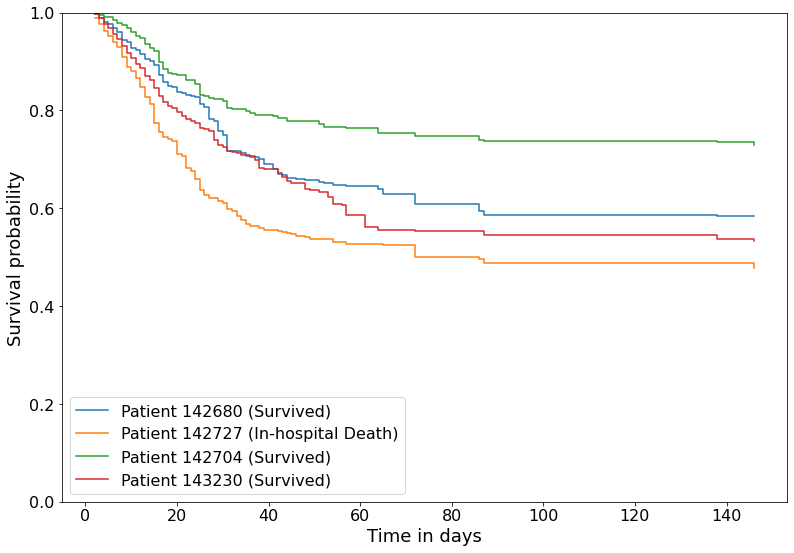

In [29]:
plt.figure(figsize=(13,9))
plt.step(rsf.event_times_, Surv_Func[2], where="post", label='Patient 142680 (Survived)')
plt.step(rsf.event_times_, Surv_Func[26], where="post", label='Patient 142727 (In-hospital Death)')
plt.step(rsf.event_times_, Surv_Func[14], where="post", label='Patient 142704 (Survived)')
plt.step(rsf.event_times_, Surv_Func[208], where="post", label='Patient 143230 (Survived)')

plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.ylim(0,1)
plt.legend(loc='lower left')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

In [30]:
#convert to dataframe
Surv_Func = pd.DataFrame(Surv_Func)
Surv_Func

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,0.990396,0.949068,0.929379,0.915847,0.885920,0.861389,0.847668,0.836485,0.822961,0.806540,0.797234,0.782127,0.768933,0.765765,0.740908,0.733151,0.728694,0.716301,0.708156,0.702395,0.699756,0.699434,0.694398,0.688529,0.682090,0.676729,0.674541,0.667618,0.665773,0.663570,0.663570,0.661805,0.657739,0.638305,0.638305,0.636868,0.636868,0.633256,0.633256,0.588398,0.583146,0.578971,0.577241,0.574073,0.574073,0.573128,0.560240,0.558757,0.553013,0.543170,0.542856,0.539290,0.529221,0.529221,0.523721,0.512859,0.512859,0.512859,0.512859,0.510146,0.507757,0.499140
1,0.994181,0.979094,0.957729,0.946077,0.930006,0.907174,0.881539,0.864229,0.843169,0.839492,0.827532,0.811979,0.802350,0.794447,0.772287,0.760780,0.757862,0.751622,0.742223,0.738286,0.719573,0.718151,0.706755,0.703310,0.700197,0.691342,0.685403,0.669616,0.662067,0.638102,0.638102,0.637435,0.634388,0.629439,0.629146,0.624325,0.624325,0.613243,0.602753,0.588529,0.585276,0.582246,0.569026,0.569026,0.564454,0.564454,0.562454,0.554647,0.554647,0.552304,0.551850,0.550116,0.544712,0.543163,0.541011,0.539011,0.539011,0.529433,0.528547,0.520746,0.503082,0.493397
2,0.997368,0.989688,0.981173,0.975958,0.968754,0.960173,0.944503,0.940352,0.926914,0.923753,0.915549,0.904664,0.900262,0.892685,0.871572,0.857100,0.849556,0.847744,0.838370,0.835738,0.830894,0.830421,0.827220,0.812392,0.806029,0.782233,0.777792,0.757874,0.749721,0.716341,0.716341,0.716341,0.713958,0.707471,0.705471,0.704021,0.701364,0.689487,0.680325,0.670415,0.668415,0.661184,0.661184,0.660517,0.657767,0.656967,0.653474,0.652224,0.652224,0.648193,0.648193,0.645698,0.645698,0.645698,0.639593,0.628676,0.608700,0.608700,0.594155,0.585841,0.584409,0.584409
3,0.990681,0.952127,0.930809,0.917957,0.892329,0.862599,0.851354,0.840970,0.826671,0.809349,0.796199,0.774254,0.764685,0.759747,0.738126,0.725592,0.719228,0.704569,0.700279,0.692776,0.689246,0.688559,0.685344,0.674636,0.668281,0.663121,0.659450,0.652137,0.651464,0.649887,0.649887,0.649609,0.648505,0.623037,0.622037,0.621266,0.619899,0.618346,0.612501,0.571422,0.559912,0.556396,0.552644,0.548708,0.548708,0.547564,0.543564,0.542490,0.534083,0.525129,0.525129,0.524184,0.520004,0.520004,0.510433,0.497726,0.497726,0.497299,0.496065,0.496065,0.490501,0.477057
4,0.997966,0.987096,0.974671,0.969165,0.962715,0.955457,0.939899,0.935308,0.927580,0.923310,0.903483,0.889747,0.884433,0.866921,0.852594,0.844063,0.835504,0.831140,0.824514,0.821492,0.816577,0.816318,0.810294,0.804604,0.798421,0.790174,0.789357,0.781724,0.778875,0.769468,0.768781,0.766141,0.757765,0.755098,0.741811,0.741811,0.737369,0.727834,0.726191,0.726191,0.721317,0.708328,0.707162,0.707162,0.702686,0.700766,0.700766,0.699516,0.698144,0.686807,0.686807,0.684807,0.684807,0.681629,0.670806,0.670806,0.665373,0.663373,0.651373,0.645373,0.645373,0.613370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,0.999211,0.997258,0.992921,0.988688,0.982851,0.978090,0.972886,0.968864,0.964817,0.959775,0.952121,0.945721,0.940373,0.936702,0.932417,0.918639,0.917984,0.915139,0.914581,0.908539,0.897648,0.897648,0.890814,0.888098,0.884908,0.881018,0.872278,0.867571,0.864526,0.858743,0.857931,0.854234,0.852073,0.850180,0.848180,0.843544,0.841182,0.837182,0.834800,0.828933,0.823399,0.813849,0.812049,0.810299,0.810299,0.810299,0.781425,0.772429,0.772429,0.761856,0.761856,0.761856,0.761856,0.760911,0.752827,0.752827,0.737211,0.733211,0.731211,0.711233,0.711233,0.680433
3937,0.987633,0.956288,0.918289,0.890975,0.865967,0.844340,0.815355,0.781430,0.766158,0.758557,0.731758,0.699560,0.679827,0.664990,0.636396,0.628415,0.614973,0.607368,0.575792,0.567637,0.543147,0.530413,0.521

In [31]:
#concatenate patient no to survival rate dataframe
Surv_Func_Concat = pd.concat([y_test1.reset_index(drop=False), Surv_Func.reset_index(drop=True)], axis = 1) 
Surv_Func_Concat = Surv_Func_Concat.drop(['In-hospital_death', 'Length_of_stay'], axis = 1)
Surv_Func_Concat = Surv_Func_Concat.set_index('index')

In [32]:
Surv_Func1 = Surv_Func_Concat

In [33]:
#rename time index by event time
Surv_Func1.columns = rsf.event_times_

In [34]:
Surv_Func1

,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,41.0,42.0,43.0,44.0,45.0,46.0,48.0,49.0,51.0,52.0,53.0,54.0,56.0,57.0,58.0,61.0,64.0,65.0,72.0,76.0,86.0,87.0,138.0,146.0
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.990396,0.949068,0.929379,0.915847,0.885920,0.861389,0.847668,0.836485,0.822961,0.806540,0.797234,0.782127,0.768933,0.765765,0.740908,0.733151,0.728694,0.716301,0.708156,0.702395,0.699756,0.699434,0.694398,0.688529,0.682090,0.676729,0.674541,0.667618,0.665773,0.663570,0.663570,0.661805,0.657739,0.638305,0.638305,0.636868,0.636868,0.633256,0.633256,0.588398,0.583146,0.578971,0.577241,0.574073,0.574073,0.573128,0.560240,0.558757,0.553013,0.543170,0.542856,0.539290,0.529221,0.529221,0.523721,0.512859,0.512859,0.512859,0.512859,0.510146,0.507757,0.499140
1,0.994181,0.979094,0.957729,0.946077,0.930006,0.907174,0.881539,0.864229,0.843169,0.839492,0.827532,0.811979,0.802350,0.794447,0.772287,0.760780,0.757862,0.751622,0.742223,0.738286,0.719573,0.718151,0.706755,0.703310,0.700197,0.691342,0.685403,0.669616,0.662067,0.638102,0.638102,0.637435,0.634388,0.629439,0.629146,0.624325,0.624325,0.613243,0.602753,0.588529,0.585276,0.582246,0.569026,0.569026,0.564454,0.564454,0.562454,0.554647,0.554647,0.552304,0.551850,0.550116,0.544712,0.543163,0.541011,0.539011,0.539011,0.529433,0.528547,0.520746,0.503082,0.493397
2,0.997368,0.989688,0.981173,0.975958,0.968754,0.960173,0.944503,0.940352,0.926914,0.923753,0.915549,0.904664,0.900262,0.892685,0.871572,0.857100,0.849556,0.847744,0.838370,0.835738,0.830894,0.830421,0.827220,0.812392,0.806029,0.782233,0.777792,0.757874,0.749721,0.716341,0.716341,0.716341,0.713958,0.707471,0.705471,0.704021,0.701364,0.689487,0.680325,0.670415,0.668415,0.661184,0.661184,0.660517,0.657767,0.656967,0.653474,0.652224,0.652224,0.648193,0.648193,0.645698,0.645698,0.645698,0.639593,0.628676,0.608700,0.608700,0.594155,0.585841,0.584409,0.584409
3,0.990681,0.952127,0.930809,0.917957,0.892329,0.862599,0.851354,0.840970,0.826671,0.809349,0.796199,0.774254,0.764685,0.759747,0.738126,0.725592,0.719228,0.704569,0.700279,0.692776,0.689246,0.688559,0.685344,0.674636,0.668281,0.663121,0.659450,0.652137,0.651464,0.649887,0.649887,0.649609,0.648505,0.623037,0.622037,0.621266,0.619899,0.618346,0.612501,0.571422,0.559912,0.556396,0.552644,0.548708,0.548708,0.547564,0.543564,0.542490,0.534083,0.525129,0.525129,0.524184,0.520004,0.520004,0.510433,0.497726,0.497726,0.497299,0.496065,0.496065,0.490501,0.477057
4,0.997966,0.987096,0.974671,0.969165,0.962715,0.955457,0.939899,0.935308,0.927580,0.923310,0.903483,0.889747,0.884433,0.866921,0.852594,0.844063,0.835504,0.831140,0.824514,0.821492,0.816577,0.816318,0.810294,0.804604,0.798421,0.790174,0.789357,0.781724,0.778875,0.769468,0.768781,0.766141,0.757765,0.755098,0.741811,0.741811,0.737369,0.727834,0.726191,0.726191,0.721317,0.708328,0.707162,0.707162,0.702686,0.700766,0.700766,0.699516,0.698144,0.686807,0.686807,0.684807,0.684807,0.681629,0.670806,0.670806,0.665373,0.663373,0.651373,0.645373,0.645373,0.613370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,0.999211,0.997258,0.992921,0.988688,0.982851,0.978090,0.972886,0.968864,0.964817,0.959775,0.952121,0.945721,0.940373,0.936702,0.932417,0.918639,0.917984,0.915139,0.914581,0.908539,0.897648,0.897648,0.890814,0.888098,0.884908,0.881018,0.872278,0.867571,0.864526,0.858743,0.857931,0.854234,0.852073,0.850180,0.848180,0.843544,0.841182,0.837182,0.834800,0.828933,0.823399,0.813849,0.812049,0.810299,0.810299,0.810299,0.781425,0.772429,0.772429,0.761856,0.761856,0.761856,0.761856,0.760911,0.752827,0.752827,0.737211,0.733211,0.731211,0.711233,0.711233,0.680433
3991,0.98763

In [35]:
#rename column title as patient
Surv_Func1.index.name = 'Patient Index'

In [36]:
Surv_Func1
#Surv_Func1.to_csv("Surv_Func.csv")

,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,41.0,42.0,43.0,44.0,45.0,46.0,48.0,49.0,51.0,52.0,53.0,54.0,56.0,57.0,58.0,61.0,64.0,65.0,72.0,76.0,86.0,87.0,138.0,146.0
Patient Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.990396,0.949068,0.929379,0.915847,0.885920,0.861389,0.847668,0.836485,0.822961,0.806540,0.797234,0.782127,0.768933,0.765765,0.740908,0.733151,0.728694,0.716301,0.708156,0.702395,0.699756,0.699434,0.694398,0.688529,0.682090,0.676729,0.674541,0.667618,0.665773,0.663570,0.663570,0.661805,0.657739,0.638305,0.638305,0.636868,0.636868,0.633256,0.633256,0.588398,0.583146,0.578971,0.577241,0.574073,0.574073,0.573128,0.560240,0.558757,0.553013,0.543170,0.542856,0.539290,0.529221,0.529221,0.523721,0.512859,0.512859,0.512859,0.512859,0.510146,0.507757,0.499140
1,0.994181,0.979094,0.957729,0.946077,0.930006,0.907174,0.881539,0.864229,0.843169,0.839492,0.827532,0.811979,0.802350,0.794447,0.772287,0.760780,0.757862,0.751622,0.742223,0.738286,0.719573,0.718151,0.706755,0.703310,0.700197,0.691342,0.685403,0.669616,0.662067,0.638102,0.638102,0.637435,0.634388,0.629439,0.629146,0.624325,0.624325,0.613243,0.602753,0.588529,0.585276,0.582246,0.569026,0.569026,0.564454,0.564454,0.562454,0.554647,0.554647,0.552304,0.551850,0.550116,0.544712,0.543163,0.541011,0.539011,0.539011,0.529433,0.528547,0.520746,0.503082,0.493397
2,0.997368,0.989688,0.981173,0.975958,0.968754,0.960173,0.944503,0.940352,0.926914,0.923753,0.915549,0.904664,0.900262,0.892685,0.871572,0.857100,0.849556,0.847744,0.838370,0.835738,0.830894,0.830421,0.827220,0.812392,0.806029,0.782233,0.777792,0.757874,0.749721,0.716341,0.716341,0.716341,0.713958,0.707471,0.705471,0.704021,0.701364,0.689487,0.680325,0.670415,0.668415,0.661184,0.661184,0.660517,0.657767,0.656967,0.653474,0.652224,0.652224,0.648193,0.648193,0.645698,0.645698,0.645698,0.639593,0.628676,0.608700,0.608700,0.594155,0.585841,0.584409,0.584409
3,0.990681,0.952127,0.930809,0.917957,0.892329,0.862599,0.851354,0.840970,0.826671,0.809349,0.796199,0.774254,0.764685,0.759747,0.738126,0.725592,0.719228,0.704569,0.700279,0.692776,0.689246,0.688559,0.685344,0.674636,0.668281,0.663121,0.659450,0.652137,0.651464,0.649887,0.649887,0.649609,0.648505,0.623037,0.622037,0.621266,0.619899,0.618346,0.612501,0.571422,0.559912,0.556396,0.552644,0.548708,0.548708,0.547564,0.543564,0.542490,0.534083,0.525129,0.525129,0.524184,0.520004,0.520004,0.510433,0.497726,0.497726,0.497299,0.496065,0.496065,0.490501,0.477057
4,0.997966,0.987096,0.974671,0.969165,0.962715,0.955457,0.939899,0.935308,0.927580,0.923310,0.903483,0.889747,0.884433,0.866921,0.852594,0.844063,0.835504,0.831140,0.824514,0.821492,0.816577,0.816318,0.810294,0.804604,0.798421,0.790174,0.789357,0.781724,0.778875,0.769468,0.768781,0.766141,0.757765,0.755098,0.741811,0.741811,0.737369,0.727834,0.726191,0.726191,0.721317,0.708328,0.707162,0.707162,0.702686,0.700766,0.700766,0.699516,0.698144,0.686807,0.686807,0.684807,0.684807,0.681629,0.670806,0.670806,0.665373,0.663373,0.651373,0.645373,0.645373,0.613370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,0.999211,0.997258,0.992921,0.988688,0.982851,0.978090,0.972886,0.968864,0.964817,0.959775,0.952121,0.945721,0.940373,0.936702,0.932417,0.918639,0.917984,0.915139,0.914581,0.908539,0.897648,0.897648,0.890814,0.888098,0.884908,0.881018,0.872278,0.867571,0.864526,0.858743,0.857931,0.854234,0.852073,0.850180,0.848180,0.843544,0.841182,0.837182,0.834800,0.828933,0.823399,0.813849,0.812049,0.810299,0.810299,0.810299,0.781425,0.772429,0.772429,0.761856,0.761856,0.761856,0.761856,0.760911,0.752827,0.752827,0.737211,0.733211,0.731211,0.711233,0.711233,0.680433
3991

In [37]:
#find index of patients which survival function is < 0.5
Length = Surv_Func1.where(Surv_Func1 <= 0.5).stack().index.values

In [38]:
#split tuple into list
Patient_index = []
Time = []

for i in Length:
   Patient_index.append(i[0])
   Time.append(i[1])

In [39]:
#create dataframe containing patient index and time (length of stay)
Patient_index = pd.DataFrame(Patient_index)
Time = pd.DataFrame(Time)
Combined = pd.concat([Patient_index, Time], axis = 1)

Combined.columns = ['Patient_Index', 'Time']
Combined

,Patient_Index,Time
0,0,146.0
1,1,146.0
2,3,65.0
3,3,72.0
4,3,76.0
...,...,...
35225,3991,87.0
35226,3991,138.0
35227,3991,146.0
35228,3992,138.0


In [40]:
#find first occurrence (index) where survivial rate < 0.5
Combined = Combined.sort_values('Time').drop_duplicates(subset=['Patient_Index'])
Combined

,Patient_Index,Time
9291,1094,16.0
28465,3204,16.0
17127,1942,16.0
34788,3937,17.0
12972,1498,17.0
...,...,...
23144,2596,146.0
23225,2607,146.0
23248,2612,146.0
23412,2641,146.0


In [41]:
#set index as column in dataframe
Surv_Func1['Patient_Index'] = Surv_Func1.index

In [42]:
#merge to original dataframe
Surv_Func2 = Surv_Func1.merge(Combined, left_on = 'Patient Index', right_on = 'Patient_Index', how = 'left') 
Surv_Func2

,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,41.0,42.0,43.0,44.0,45.0,46.0,48.0,49.0,51.0,52.0,53.0,54.0,56.0,57.0,58.0,61.0,64.0,65.0,72.0,76.0,86.0,87.0,138.0,146.0,Patient_Index_x,Patient_Index_y,Time
0,0.990396,0.949068,0.929379,0.915847,0.885920,0.861389,0.847668,0.836485,0.822961,0.806540,0.797234,0.782127,0.768933,0.765765,0.740908,0.733151,0.728694,0.716301,0.708156,0.702395,0.699756,0.699434,0.694398,0.688529,0.682090,0.676729,0.674541,0.667618,0.665773,0.663570,0.663570,0.661805,0.657739,0.638305,0.638305,0.636868,0.636868,0.633256,0.633256,0.588398,0.583146,0.578971,0.577241,0.574073,0.574073,0.573128,0.560240,0.558757,0.553013,0.543170,0.542856,0.539290,0.529221,0.529221,0.523721,0.512859,0.512859,0.512859,0.512859,0.510146,0.507757,0.499140,0,0.0,146.0
1,0.994181,0.979094,0.957729,0.946077,0.930006,0.907174,0.881539,0.864229,0.843169,0.839492,0.827532,0.811979,0.802350,0.794447,0.772287,0.760780,0.757862,0.751622,0.742223,0.738286,0.719573,0.718151,0.706755,0.703310,0.700197,0.691342,0.685403,0.669616,0.662067,0.638102,0.638102,0.637435,0.634388,0.629439,0.629146,0.624325,0.624325,0.613243,0.602753,0.588529,0.585276,0.582246,0.569026,0.569026,0.564454,0.564454,0.562454,0.554647,0.554647,0.552304,0.551850,0.550116,0.544712,0.543163,0.541011,0.539011,0.539011,0.529433,0.528547,0.520746,0.503082,0.493397,1,1.0,146.0
2,0.997368,0.989688,0.981173,0.975958,0.968754,0.960173,0.944503,0.940352,0.926914,0.923753,0.915549,0.904664,0.900262,0.892685,0.871572,0.857100,0.849556,0.847744,0.838370,0.835738,0.830894,0.830421,0.827220,0.812392,0.806029,0.782233,0.777792,0.757874,0.749721,0.716341,0.716341,0.716341,0.713958,0.707471,0.705471,0.704021,0.701364,0.689487,0.680325,0.670415,0.668415,0.661184,0.661184,0.660517,0.657767,0.656967,0.653474,0.652224,0.652224,0.648193,0.648193,0.645698,0.645698,0.645698,0.639593,0.628676,0.608700,0.608700,0.594155,0.585841,0.584409,0.584409,2,NaN,NaN
3,0.990681,0.952127,0.930809,0.917957,0.892329,0.862599,0.851354,0.840970,0.826671,0.809349,0.796199,0.774254,0.764685,0.759747,0.738126,0.725592,0.719228,0.704569,0.700279,0.692776,0.689246,0.688559,0.685344,0.674636,0.668281,0.663121,0.659450,0.652137,0.651464,0.649887,0.649887,0.649609,0.648505,0.623037,0.622037,0.621266,0.619899,0.618346,0.612501,0.571422,0.559912,0.556396,0.552644,0.548708,0.548708,0.547564,0.543564,0.542490,0.534083,0.525129,0.525129,0.524184,0.520004,0.520004,0.510433,0.497726,0.497726,0.497299,0.496065,0.496065,0.490501,0.477057,3,3.0,65.0
4,0.997966,0.987096,0.974671,0.969165,0.962715,0.955457,0.939899,0.935308,0.927580,0.923310,0.903483,0.889747,0.884433,0.866921,0.852594,0.844063,0.835504,0.831140,0.824514,0.821492,0.816577,0.816318,0.810294,0.804604,0.798421,0.790174,0.789357,0.781724,0.778875,0.769468,0.768781,0.766141,0.757765,0.755098,0.741811,0.741811,0.737369,0.727834,0.726191,0.726191,0.721317,0.708328,0.707162,0.707162,0.702686,0.700766,0.700766,0.699516,0.698144,0.686807,0.686807,0.684807,0.684807,0.681629,0.670806,0.670806,0.665373,0.663373,0.651373,0.645373,0.645373,0.613370,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,0.999211,0.997258,0.992921,0.988688,0.982851,0.978090,0.972886,0.968864,0.964817,0.959775,0.952121,0.945721,0.940373,0.936702,0.932417,0.918639,0.917984,0.915139,0.914581,0.908539,0.897648,0.897648,0.890814,0.888098,0.884908,0.881018,0.872278,0.867571,0.864526,0.858743,0.857931,0.854234,0.852073,0.850180,0.848180,0.843544,0.841182,0.837182,0.834800,0.828933,0.823399,0.813849,0.812049,0.810299,0.810299,0.810299,0.781425,0.772429,0.772429,0.761856,0.761856,0.761856,0.761856,0.760911,0.752827,0.752827,0.737211,0.733211,0.731211,0.7

In [44]:
#drop patient_index_y (duplicate column)
Surv_Func2 = Surv_Func2.drop(['Patient_Index_y'],axis =1)
Surv_Func2

,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,41.0,42.0,43.0,44.0,45.0,46.0,48.0,49.0,51.0,52.0,53.0,54.0,56.0,57.0,58.0,61.0,64.0,65.0,72.0,76.0,86.0,87.0,138.0,146.0,Patient_Index_x,Time
0,0.990396,0.949068,0.929379,0.915847,0.885920,0.861389,0.847668,0.836485,0.822961,0.806540,0.797234,0.782127,0.768933,0.765765,0.740908,0.733151,0.728694,0.716301,0.708156,0.702395,0.699756,0.699434,0.694398,0.688529,0.682090,0.676729,0.674541,0.667618,0.665773,0.663570,0.663570,0.661805,0.657739,0.638305,0.638305,0.636868,0.636868,0.633256,0.633256,0.588398,0.583146,0.578971,0.577241,0.574073,0.574073,0.573128,0.560240,0.558757,0.553013,0.543170,0.542856,0.539290,0.529221,0.529221,0.523721,0.512859,0.512859,0.512859,0.512859,0.510146,0.507757,0.499140,0,146.0
1,0.994181,0.979094,0.957729,0.946077,0.930006,0.907174,0.881539,0.864229,0.843169,0.839492,0.827532,0.811979,0.802350,0.794447,0.772287,0.760780,0.757862,0.751622,0.742223,0.738286,0.719573,0.718151,0.706755,0.703310,0.700197,0.691342,0.685403,0.669616,0.662067,0.638102,0.638102,0.637435,0.634388,0.629439,0.629146,0.624325,0.624325,0.613243,0.602753,0.588529,0.585276,0.582246,0.569026,0.569026,0.564454,0.564454,0.562454,0.554647,0.554647,0.552304,0.551850,0.550116,0.544712,0.543163,0.541011,0.539011,0.539011,0.529433,0.528547,0.520746,0.503082,0.493397,1,146.0
2,0.997368,0.989688,0.981173,0.975958,0.968754,0.960173,0.944503,0.940352,0.926914,0.923753,0.915549,0.904664,0.900262,0.892685,0.871572,0.857100,0.849556,0.847744,0.838370,0.835738,0.830894,0.830421,0.827220,0.812392,0.806029,0.782233,0.777792,0.757874,0.749721,0.716341,0.716341,0.716341,0.713958,0.707471,0.705471,0.704021,0.701364,0.689487,0.680325,0.670415,0.668415,0.661184,0.661184,0.660517,0.657767,0.656967,0.653474,0.652224,0.652224,0.648193,0.648193,0.645698,0.645698,0.645698,0.639593,0.628676,0.608700,0.608700,0.594155,0.585841,0.584409,0.584409,2,NaN
3,0.990681,0.952127,0.930809,0.917957,0.892329,0.862599,0.851354,0.840970,0.826671,0.809349,0.796199,0.774254,0.764685,0.759747,0.738126,0.725592,0.719228,0.704569,0.700279,0.692776,0.689246,0.688559,0.685344,0.674636,0.668281,0.663121,0.659450,0.652137,0.651464,0.649887,0.649887,0.649609,0.648505,0.623037,0.622037,0.621266,0.619899,0.618346,0.612501,0.571422,0.559912,0.556396,0.552644,0.548708,0.548708,0.547564,0.543564,0.542490,0.534083,0.525129,0.525129,0.524184,0.520004,0.520004,0.510433,0.497726,0.497726,0.497299,0.496065,0.496065,0.490501,0.477057,3,65.0
4,0.997966,0.987096,0.974671,0.969165,0.962715,0.955457,0.939899,0.935308,0.927580,0.923310,0.903483,0.889747,0.884433,0.866921,0.852594,0.844063,0.835504,0.831140,0.824514,0.821492,0.816577,0.816318,0.810294,0.804604,0.798421,0.790174,0.789357,0.781724,0.778875,0.769468,0.768781,0.766141,0.757765,0.755098,0.741811,0.741811,0.737369,0.727834,0.726191,0.726191,0.721317,0.708328,0.707162,0.707162,0.702686,0.700766,0.700766,0.699516,0.698144,0.686807,0.686807,0.684807,0.684807,0.681629,0.670806,0.670806,0.665373,0.663373,0.651373,0.645373,0.645373,0.613370,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,0.999211,0.997258,0.992921,0.988688,0.982851,0.978090,0.972886,0.968864,0.964817,0.959775,0.952121,0.945721,0.940373,0.936702,0.932417,0.918639,0.917984,0.915139,0.914581,0.908539,0.897648,0.897648,0.890814,0.888098,0.884908,0.881018,0.872278,0.867571,0.864526,0.858743,0.857931,0.854234,0.852073,0.850180,0.848180,0.843544,0.841182,0.837182,0.834800,0.828933,0.823399,0.813849,0.812049,0.810299,0.810299,0.810299,0.781425,0.772429,0.772429,0.761856,0.761856,0.761856,0.761856,0.760911,0.752827,0.752827,0.737211,0.733211,0.731211,0.711233,0.711233,0.680433,3990,NaN
3937,0.

In [47]:
#map patient index to patient ID

#read original dataset
df_final = pd.read_pickle(r'df_final_short_B.pkl')

#create variable patient index
Patient = pd.DataFrame(df_final[['Patient', 'In-hospital_deathmax']])
Patient['Patient_Index'] = Patient.index

In [48]:
Surv_Func3 = Surv_Func2.merge(Patient, left_on = 'Patient_Index_x', right_on = 'Patient_Index', how = 'left') 
Surv_Func3

,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,41.0,42.0,43.0,44.0,45.0,46.0,48.0,49.0,51.0,52.0,53.0,54.0,56.0,57.0,58.0,61.0,64.0,65.0,72.0,76.0,86.0,87.0,138.0,146.0,Patient_Index_x,Time,Patient,In-hospital_deathmax,Patient_Index
0,0.990396,0.949068,0.929379,0.915847,0.885920,0.861389,0.847668,0.836485,0.822961,0.806540,0.797234,0.782127,0.768933,0.765765,0.740908,0.733151,0.728694,0.716301,0.708156,0.702395,0.699756,0.699434,0.694398,0.688529,0.682090,0.676729,0.674541,0.667618,0.665773,0.663570,0.663570,0.661805,0.657739,0.638305,0.638305,0.636868,0.636868,0.633256,0.633256,0.588398,0.583146,0.578971,0.577241,0.574073,0.574073,0.573128,0.560240,0.558757,0.553013,0.543170,0.542856,0.539290,0.529221,0.529221,0.523721,0.512859,0.512859,0.512859,0.512859,0.510146,0.507757,0.499140,0,146.0,142675,1,0
1,0.994181,0.979094,0.957729,0.946077,0.930006,0.907174,0.881539,0.864229,0.843169,0.839492,0.827532,0.811979,0.802350,0.794447,0.772287,0.760780,0.757862,0.751622,0.742223,0.738286,0.719573,0.718151,0.706755,0.703310,0.700197,0.691342,0.685403,0.669616,0.662067,0.638102,0.638102,0.637435,0.634388,0.629439,0.629146,0.624325,0.624325,0.613243,0.602753,0.588529,0.585276,0.582246,0.569026,0.569026,0.564454,0.564454,0.562454,0.554647,0.554647,0.552304,0.551850,0.550116,0.544712,0.543163,0.541011,0.539011,0.539011,0.529433,0.528547,0.520746,0.503082,0.493397,1,146.0,142676,0,1
2,0.997368,0.989688,0.981173,0.975958,0.968754,0.960173,0.944503,0.940352,0.926914,0.923753,0.915549,0.904664,0.900262,0.892685,0.871572,0.857100,0.849556,0.847744,0.838370,0.835738,0.830894,0.830421,0.827220,0.812392,0.806029,0.782233,0.777792,0.757874,0.749721,0.716341,0.716341,0.716341,0.713958,0.707471,0.705471,0.704021,0.701364,0.689487,0.680325,0.670415,0.668415,0.661184,0.661184,0.660517,0.657767,0.656967,0.653474,0.652224,0.652224,0.648193,0.648193,0.645698,0.645698,0.645698,0.639593,0.628676,0.608700,0.608700,0.594155,0.585841,0.584409,0.584409,2,NaN,142680,1,2
3,0.990681,0.952127,0.930809,0.917957,0.892329,0.862599,0.851354,0.840970,0.826671,0.809349,0.796199,0.774254,0.764685,0.759747,0.738126,0.725592,0.719228,0.704569,0.700279,0.692776,0.689246,0.688559,0.685344,0.674636,0.668281,0.663121,0.659450,0.652137,0.651464,0.649887,0.649887,0.649609,0.648505,0.623037,0.622037,0.621266,0.619899,0.618346,0.612501,0.571422,0.559912,0.556396,0.552644,0.548708,0.548708,0.547564,0.543564,0.542490,0.534083,0.525129,0.525129,0.524184,0.520004,0.520004,0.510433,0.497726,0.497726,0.497299,0.496065,0.496065,0.490501,0.477057,3,65.0,142683,0,3
4,0.997966,0.987096,0.974671,0.969165,0.962715,0.955457,0.939899,0.935308,0.927580,0.923310,0.903483,0.889747,0.884433,0.866921,0.852594,0.844063,0.835504,0.831140,0.824514,0.821492,0.816577,0.816318,0.810294,0.804604,0.798421,0.790174,0.789357,0.781724,0.778875,0.769468,0.768781,0.766141,0.757765,0.755098,0.741811,0.741811,0.737369,0.727834,0.726191,0.726191,0.721317,0.708328,0.707162,0.707162,0.702686,0.700766,0.700766,0.699516,0.698144,0.686807,0.686807,0.684807,0.684807,0.681629,0.670806,0.670806,0.665373,0.663373,0.651373,0.645373,0.645373,0.613370,4,NaN,142688,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,0.999211,0.997258,0.992921,0.988688,0.982851,0.978090,0.972886,0.968864,0.964817,0.959775,0.952121,0.945721,0.940373,0.936702,0.932417,0.918639,0.917984,0.915139,0.914581,0.908539,0.897648,0.897648,0.890814,0.888098,0.884908,0.881018,0.872278,0.867571,0.864526,0.858743,0.857931,0.854234,0.852073,0.850180,0.848180,0.843544,0.841182,0.837182,0.834800,0.828933,0.823399,0.813849,0.812049,0.810299,0.810299,0.810299,0.781425,0.772429,0.772429,0.761856,0.761856,0.761

In [49]:
Surv_Func3.head()
Surv_Func3.to_csv("RSF_Median_SurvFunc.csv")

C:\Users\Alvin\Anaconda3\envs\Survival\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Alvin\Anaconda3\envs\Survival\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, "Frequency Distribution of Patient's Length of Stay (All Patients)")

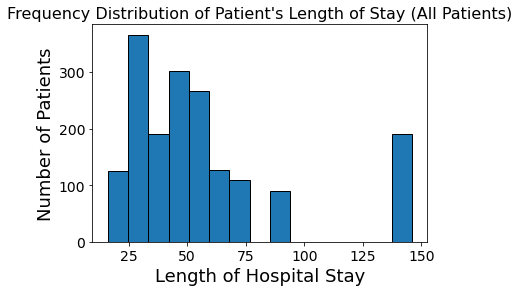

In [50]:
#plot distribution of length of stay for all patients in test set

ax = plt.axes()
ax.hist(Surv_Func3['Time'], bins = 15, edgecolor='black', label='Predicted')
ax.set_ylabel("Number of Patients")
ax.set_xlabel("Length of Hospital Stay")
plt.title("Frequency Distribution of Patient's Length of Stay (All Patients)")


Text(0.5, 1.0, 'Frequency Distribution of Length of Stay for Patients Who Died in Hospital')

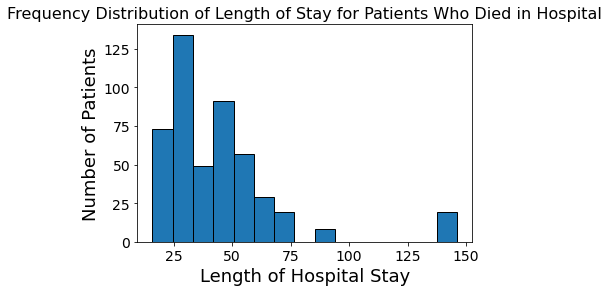

In [51]:
#plot distribution of length of stay for all patients who died in hospital
Surv_Func4 = Surv_Func3[Surv_Func3['In-hospital_deathmax'] == 1]
ax = plt.axes()
ax.hist(Surv_Func4['Time'], bins = 15, edgecolor='black')
ax.set_ylabel("Number of Patients")
ax.set_xlabel("Length of Hospital Stay")
plt.title("Frequency Distribution of Length of Stay for Patients Who Died in Hospital")

Text(0.5, 1.0, 'Frequency Distribution of Length of Stay for Patients Who did not Died in Hospital')

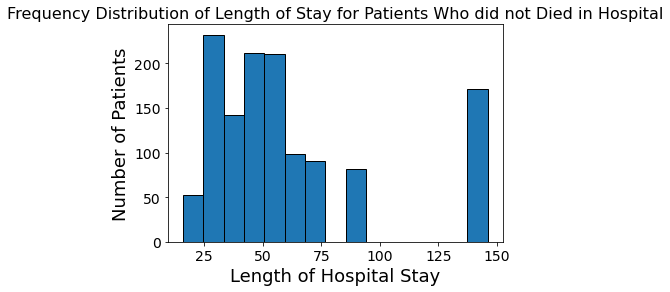

In [52]:
#plot distribution of length of stay for all patients who did not die in hospital
Surv_Func5 = Surv_Func3[Surv_Func3['In-hospital_deathmax'] == 0]
ax = plt.axes()
ax.hist(Surv_Func5['Time'], bins = 15, edgecolor='black')
ax.set_ylabel("Number of Patients")
ax.set_xlabel("Length of Hospital Stay")
plt.title("Frequency Distribution of Length of Stay for Patients Who did not Died in Hospital")